In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd # geopandas 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-earth/ne_110m_admin_0_countries.shx
/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp
/kaggle/input/natural-earth/ne_110m_admin_0_countries.dbf
/kaggle/input/natural-earth/ne_110m_admin_0_countries.prj
/kaggle/input/natural-earth/ne_110m_admin_0_countries.README.html
/kaggle/input/natural-earth/ne_110m_admin_0_countries.VERSION.txt
/kaggle/input/natural-earth/ne_110m_admin_0_countries.cpg
/kaggle/input/wfp-food-prices-zaf-csv/wfp_food_prices_zaf.csv
/kaggle/input/nigeria-food-prices-dataset/wfp_food_prices_nga.csv


In [2]:
# For your viewing pleasure and safety against bugs, a SAFETY PIG has been provided for your proctection    
# His name is Siya, may he guide you   
#  _._ _..._ .-',     _.._(`))  
# '-. `     '  /-._.-'    ',/  
#    )         \            '.  
#   / _    _    |             \  
#  |  a    a    /              |  
#  \   .-.     /                 ;    
#   '-('' ).-'       ,'       ;  
#      '-;           |      .'  
#         \           \    /  
#         | 7  .__  _.-\   \  
#         | |  |  ``/  /`  /  
#        /,_|  |   /,_/   /  
#           /,_/      '`-'  
# May it guard your code against bugs!  


In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
#the South Africa dataframe
za_df = pd.read_csv('/kaggle/input/wfp-food-prices-zaf-csv/wfp_food_prices_zaf.csv')
#the nigerian dataframe
ng_df = pd.read_csv('/kaggle/input/nigeria-food-prices-dataset/wfp_food_prices_nga.csv')



In [4]:
#the same code in one step (uncomment)
za_df = za_df.drop(index=0, columns=['latitude', 'longitude', 'priceflag'])


#drop same columns in the nigerian one for consitency(uncomment)
ng_df = ng_df.drop(index=0, columns=['latitude', 'longitude', 'priceflag'])


for the above code uncomment when running a new kernel - gives errors when run more than twice

In [5]:
#lets have the rands price in the ng dataframe
#lets make sure all values are numbers in the column price and do both df
ng_df['price'] = pd.to_numeric(ng_df['price'], errors = 'coerce')

za_df['price'] = pd.to_numeric(za_df['price'], errors = 'coerce')

In [6]:
#lets put the country in our ng df
ng_df['Country'] = ('Nigeria')

In [7]:
#lets put the country in our za df
za_df['Country'] = ('South Africa')

In [8]:
#put the price of good in rands on the NG df might be useful later lets keep it- uncomment

if 'ZAR-Price' not in ng_df.columns:
    ng_df['ZAR-Price'] = (ng_df['price'] / 83) 
    
ng_df.head(10)

,date,admin1,admin2,market,category,commodity,unit,pricetype,currency,price,usdprice,Country,ZAR-Price
1,2002-01-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Maize,KG,Wholesale,NGN,175.92,1.5398,Nigeria,2.119518
2,2002-01-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Sorghum,KG,Wholesale,NGN,155.61,1.362,Nigeria,1.874819
3,2002-01-15,Katsina,Jibia,Jibia (CBM),pulses and nuts,Beans (niebe),KG,Wholesale,NGN,196.87,1.7231,Nigeria,2.371928
4,2002-01-15,Sokoto,Gada,Illela (CBM),cereals and tubers,Maize,KG,Wholesale,NGN,153.35,1.3422,Nigeria,1.847590
5,2002-01-15,Sokoto,Gada,Illela (CBM),cereals and tubers,Millet,KG,Wholesale,NGN,146.95,1.2862,Nigeria,1.770482
6,2002-01-15,Sokoto,Gada,Illela (CBM),cereals and tubers,Sorghum,KG,Wholesale,NGN,141.50,1.2385,Nigeria,1.704819
7,2002-01-15,Sokoto,Gada,Illela (CBM),pulses and nuts,Beans (niebe),KG,Wholesale,NGN,239.07,2.0925,Nigeria,2.880361
8,2002-02-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Maize,KG,Wholesale,NGN,169.76,1.417,Nigeria,2.045301
9,2002-02-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Millet,KG,Wholesale,NGN,148.54,1.2399,Nigeria,1.789639
10,2002-02-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Rice (imported),KG,Wholesale,NGN,381.97,3.1884,Nigeria,4.602048


for the above code uncomment when running a new kernel - gives errors when run more than twice

In [9]:
#put the price of good in naira on the ZA df might be useful later lets keep it- uncomment

if 'NGN-Price' not in za_df.columns:
    za_df['NGN-Price'] = za_df['price'] * 83


za_df.tail()

,date,admin1,admin2,market,category,commodity,unit,pricetype,currency,price,usdprice,Country,NGN-Price
806,2022-05-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (yellow),KG,Wholesale,ZAR,4.86,0.3088,South Africa,403.38
807,2022-05-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,8.02,0.5096,South Africa,665.66
808,2022-06-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (white),KG,Wholesale,ZAR,4.42,0.2801,South Africa,366.86
809,2022-06-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (yellow),KG,Wholesale,ZAR,4.47,0.2833,South Africa,371.01
810,2022-06-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,7.89,0.5,South Africa,654.87


for the above code uncomment when running a new kernel - gives errors when run more than twice

In [10]:
#let us rename some column names

za_df = za_df.rename(columns = {'admin1':'province/state','admin2':'district/region','price':'ZAR-Price','usdprice': 'USD-Price'})


ng_df = ng_df.rename(columns = {'admin1':'province/state', 'admin2': 'district/region', 'price':'NGN-Price', 'usdprice': 'USD-Price'})

ng_df.sample(10)

,date,province/state,district/region,market,category,commodity,unit,pricetype,currency,NGN-Price,USD-Price,Country,ZAR-Price
30748,2021-08-15,Borno,Maiduguri,Tashan Bama,cereals and tubers,Rice (imported),1.4 KG,Retail,NGN,1000.00,2.4375,Nigeria,12.048193
39269,2021-03-15,Adamawa,Hong,Mubi,pulses and nuts,Groundnuts (shelled),100 KG,Wholesale,NGN,33725.00,88.6217,Nigeria,406.325301
32390,2021-12-15,Kano,Dawakin Tofa,Dawanau,pulses and nuts,Cowpeas (white),KG,Retail,NGN,379.90,0.9272,Nigeria,4.577108
42912,2022-04-15,Yobe,Potiskum,Potiskum,cereals and tubers,"Cassava meal (gari, yellow)",100 KG,Wholesale,NGN,19233.33,46.4551,Nigeria,231.726867
41271,2021-09-15,Kebbi,Gwandu,Gwandu,cereals and tubers,"Cassava meal (gari, yellow)",100 KG,Wholesale,NGN,42204.00,102.6861,Nigeria,508.481928
20368,2019-04-15,Borno,Maiduguri,Kusawam Shanu,miscellaneous food,Sugar,1.3 KG,Retail,NGN,500.00,1.634,Nigeria,6.024096
34497,2023-03-15,Yobe,Borsari,Bursari,oil and fats,Oil (palm),750 ML,Retail,NGN,1022.00,2.2215,Nigeria,12.313253
26029,2020-03-15,Borno,Maiduguri,Budum,vegetables and fruits,Watermelons,2.1 KG,Retail,NGN,350.00,1.0507,Nigeria,4.216867
37860,2020-10-15,Kaduna,Giwa,Giwa,cereals and tubers,Maize (white),100 KG,Wholesale,NGN,12838.71,33.7328,Nigeria,154.683253
22165,2019-08-15,Kano,Dawakin Tofa,Dawanau,non-food,Fuel (diesel),L,Retail,NGN,248.00,0.8107,Nigeria,2.987952


In [11]:
za_df.sample(10)


,date,province/state,district/region,market,category,commodity,unit,pricetype,currency,ZAR-Price,USD-Price,Country,NGN-Price
54,2001-06-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,1.03,0.1294,South Africa,85.49
531,2014-09-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,3.70,0.3373,South Africa,307.10
356,2009-11-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (yellow),KG,Wholesale,ZAR,1.44,0.1901,South Africa,119.52
479,2013-04-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (yellow),KG,Wholesale,ZAR,2.15,0.234,South Africa,178.45
726,2020-02-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,4.74,0.3113,South Africa,393.42
724,2020-02-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (white),KG,Wholesale,ZAR,2.82,0.1854,South Africa,234.06
489,2013-07-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,3.35,0.3391,South Africa,278.05
360,2009-12-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,2.11,0.2833,South Africa,175.13
786,2021-10-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Wheat,KG,Wholesale,ZAR,5.77,0.3955,South Africa,478.91
716,2019-11-15,Gauteng,West Rand District Municipality,Randfontein,cereals and tubers,Maize (yellow),KG,Wholesale,ZAR,2.67,0.1813,South Africa,221.61


In [12]:
print("this is the shape of our South African Food prices dataframe")
za_df.shape


this is the shape of our South African Food prices dataframe


(810, 13)

In [13]:
print("this is the shape of our Nigerian Food prices dataframe")
ng_df.shape

this is the shape of our Nigerian Food prices dataframe


(50291, 13)

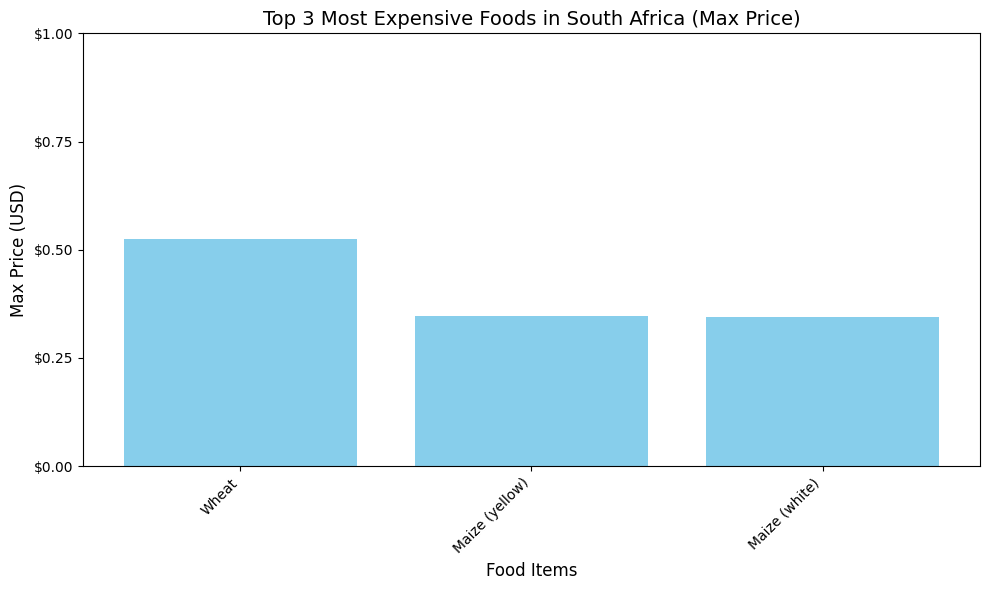

In [14]:
# Aggregate the data for South Africa
aggregated_prices_za = za_df.groupby('commodity')['USD-Price'].max().reset_index()

# Sort and get the top 3
top3_za_df = aggregated_prices_za.sort_values(by='USD-Price', ascending=False).head(3)

# Ensure USD-Price is numeric
top3_za_df['USD-Price'] = pd.to_numeric(top3_za_df['USD-Price'], errors='coerce')

# Drop any rows with NaN values (in case conversion failed for some rows)
top3_za_df = top3_za_df.dropna(subset=['USD-Price'])

# Plot the top 3 most expensive foods in South Africa
plt.figure(figsize=(10, 6))
plt.bar(top3_za_df['commodity'], top3_za_df['USD-Price'], color='skyblue')

# Add title and labels
plt.title('Top 3 Most Expensive Foods in South Africa (Max Price)', fontsize=14)
plt.xlabel('Food Items', fontsize=12)
plt.ylabel('Max Price (USD)', fontsize=12)

# Set y-axis to increase in intervals of 0.25
y_min = 0  # Start y-axis from 0
y_max = top3_za_df['USD-Price'].max() + 0.25  # Slightly higher than the maximum value for better spacing
plt.yticks(
    ticks=np.arange(y_min, y_max + 0.25, 0.25),  # Create ticks with 0.25 intervals
    labels=[f"${tick:.2f}" for tick in np.arange(y_min, y_max + 0.25, 0.25)]  # Format ticks as dollars
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit all elements
plt.tight_layout()

# Show the plot
plt.show()


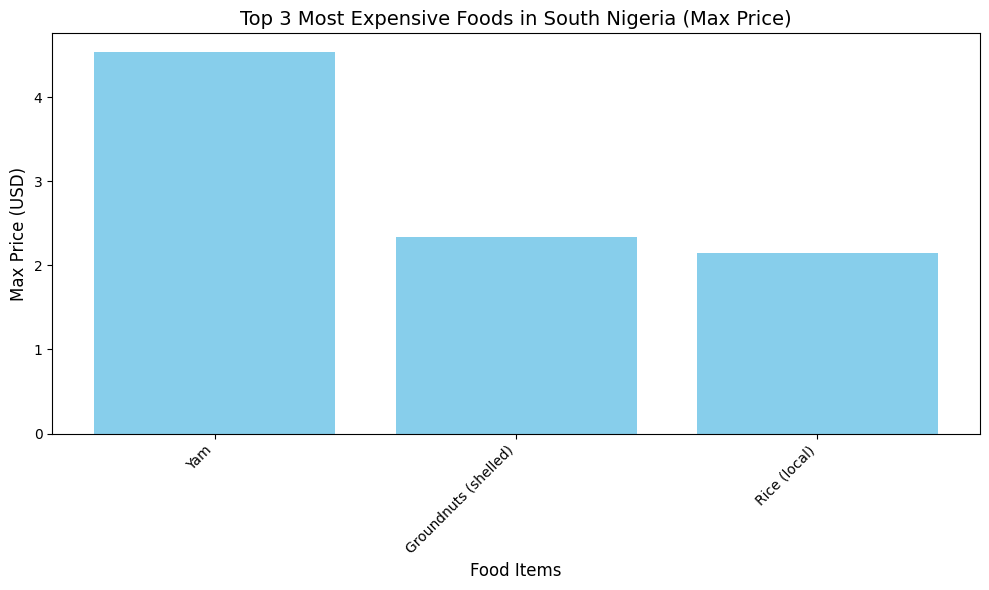

In [15]:
# Ensure USD-Price is numeric
ng_df['USD-Price'] = pd.to_numeric(ng_df['USD-Price'], errors='coerce')

# Aggregate the data
aggregated_prices_ng = ng_df.groupby('commodity')['USD-Price'].max().reset_index()

# Sort and get the top 3
top3_ng_df = aggregated_prices_ng.sort_values(by='USD-Price', ascending=False).head(3)

# Round the 'USD-Price' column to 2 decimal places
top3_ng_df['USD-Price'] = top3_ng_df['USD-Price'].round(2)

# Drop any rows with NaN values
top3_ng_df = top3_ng_df.dropna(subset=['USD-Price'])

# Divide the top values by 100
top3_ng_df['USD-Price'] = top3_ng_df['USD-Price'] / 100

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top3_ng_df['commodity'], top3_ng_df['USD-Price'], color='skyblue')
plt.title('Top 3 Most Expensive Foods in South Nigeria (Max Price)', fontsize=14)
plt.xlabel('Food Items', fontsize=12)
plt.ylabel('Max Price (USD)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit all elements
plt.tight_layout()

# Show the plot
plt.show()


this is the price of the top most expensive commodities (accordifnt our limited list)

In [16]:
top3_za_df.head()

,commodity,USD-Price
2,Wheat,0.5240
1,Maize (yellow),0.3470
0,Maize (white),0.3437


In [17]:
top3_ng_df.head()

,commodity,USD-Price
40,Yam,4.5317
15,Groundnuts (shelled),2.3325
29,Rice (local),2.1499


lets find the price of the South African top 3 in Nigeria

In [18]:
# Create an empty list to collect the rows
rows = []

# List of commodities you want to search for
commodities_to_search = ["Wheat", "Maize (yellow)", "Maize (white)"]

# Loop through each commodity
for item_to_search in commodities_to_search:
    # Filter the rows where 'commodity' matches the item_to_search
    item_df = ng_df.loc[ng_df['commodity'] == item_to_search]
    
    # Ensure the item is found
    if not item_df.empty:
        # Find the row(s) with the minimum value in 'USD-Price'
        min_price_row = item_df.loc[item_df['USD-Price'] == item_df['USD-Price'].min()]
        
        # Append the result to the rows list
        rows.append(min_price_row)

# Concatenate all rows into a single DataFrame
final_df = pd.concat(rows, ignore_index=True)

# Display the resulting DataFrame
final_df.head()


,date,province/state,district/region,market,category,commodity,unit,pricetype,currency,NGN-Price,USD-Price,Country,ZAR-Price
0,2003-12-15,Sokoto,Gada,Illela (CBM),cereals and tubers,Wheat,KG,Wholesale,NGN,105.56,0.7705,Nigeria,1.271807
1,2019-09-15,Yobe,Potiskum,Potiskum,cereals and tubers,Maize (yellow),KG,Retail,NGN,57.41,0.1870,Nigeria,0.691687
2,2019-09-15,Yobe,Potiskum,Potiskum,cereals and tubers,Maize (white),KG,Retail,NGN,57.41,0.1870,Nigeria,0.691687


therefore we can see, that the most expensive commodites in South Africa would be, wheat, maize(white) and maize (yellow), these cost 52c, 35c, 34c respetecfully all in USD, while in nigeria the same commodties cost 77c, 19c and 19c in USD respctively 

lets track the price difference over time

In [19]:
# Convert 'date' column to datetime if not already done
ng_df['date'] = pd.to_datetime(ng_df['date'], errors='coerce')




In [20]:
# Ensure 'date' is in datetime format
za_df['date'] = pd.to_datetime(ng_df['date'], errors='coerce')

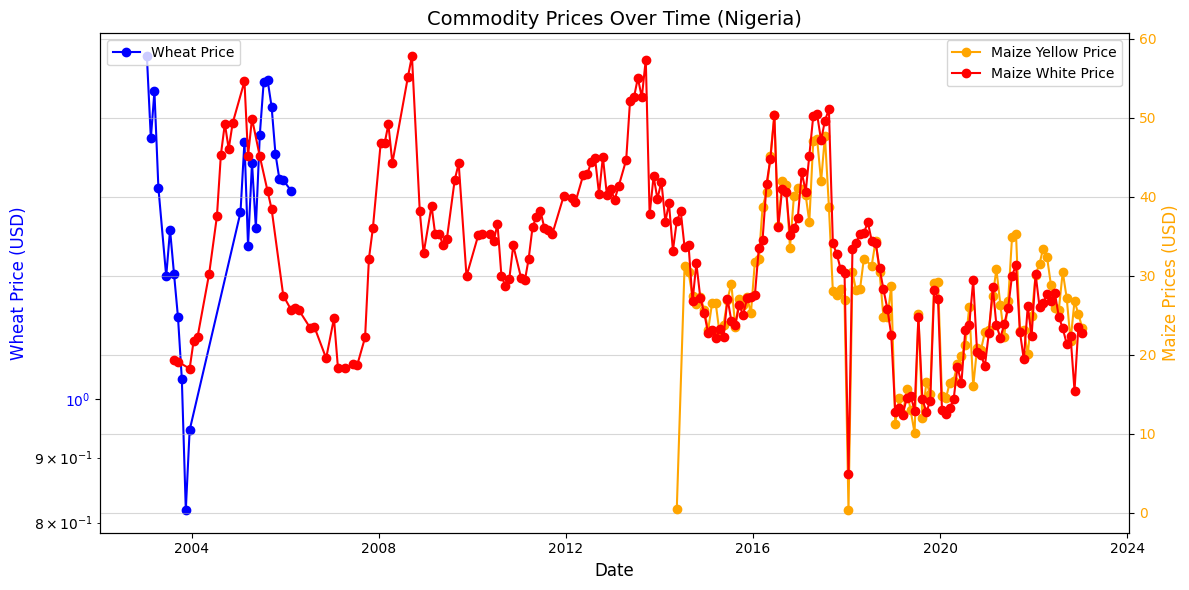

In [21]:
# Group by date and calculate the average USD price for each commodity

# Filter the data for Wheat
wheat_df = ng_df[ng_df['commodity'].str.contains('Wheat', case=False, na=False)]
maize_yellow_df = ng_df[ng_df['commodity'].str.contains('Maize \\(yellow\\)', case=False, na=False)]
maize_white_df = ng_df[ng_df['commodity'].str.contains('Maize \\(white\\)', case=False, na=False)]

# Group and calculate the average USD price
wheat_prices_over_time = wheat_df.groupby('date')['USD-Price'].mean().reset_index()
maize_yellow_over_time = maize_yellow_df.groupby('date')['USD-Price'].mean().reset_index()
maize_white_over_time = maize_white_df.groupby('date')['USD-Price'].mean().reset_index()

# Set up the plot with a logarithmic scale for the y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot wheat data on the first y-axis
ax1.plot(wheat_prices_over_time['date'], wheat_prices_over_time['USD-Price'], marker='o', color='blue', label='Wheat Price')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Wheat Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set logarithmic scale for wheat prices
ax1.set_yscale('log')

# Create a second y-axis for maize yellow and maize white
ax2 = ax1.twinx()

# Plot maize yellow and maize white data
ax2.plot(maize_yellow_over_time['date'], maize_yellow_over_time['USD-Price'], marker='o', color='orange', label='Maize Yellow Price')
ax2.plot(maize_white_over_time['date'], maize_white_over_time['USD-Price'], marker='o', color='red', label='Maize White Price')

ax2.set_ylabel('Maize Prices (USD)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title, legends, and gridlines
plt.title('Commodity Prices Over Time (Nigeria)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
ax1.legend(['Wheat Price'], loc='upper left')
ax2.legend(['Maize Yellow Price', 'Maize White Price'], loc='upper right')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Standard deviation for average wheat prices over time
wheat_over_time_std = wheat_prices_over_time['USD-Price'].std()
maize_yellow_over_time_std = maize_yellow_over_time['USD-Price'].std()
maize_white_over_time_std = maize_white_over_time['USD-Price'].std()
print(f"Standard Deviation of Average Wheat Prices Over Time: {wheat_over_time_std}")
print(f"Standard Deviation of Average Maize(white) Prices Over Time: {maize_yellow_over_time_std}")
print(f"Standard Deviation of Average Maize(yellow) Prices Over Time: {maize_white_over_time_std}")



Standard Deviation of Average Wheat Prices Over Time: 0.2670387244582814
Standard Deviation of Average Maize(white) Prices Over Time: 9.361603012895735
Standard Deviation of Average Maize(yellow) Prices Over Time: 10.860830728379172


In [23]:
maize_white_over_time_mean = maize_white_over_time['USD-Price'].mean()
maize_yellow_over_time_mean = maize_yellow_over_time['USD-Price'].mean()
wheat_over_time_mean = wheat_prices_over_time['USD-Price'].mean()

In [24]:
print(f"Mean of averange Wheat prices over time: {wheat_over_time_mean}")
print(f"Mean of averange Maize(white) prices over time: {maize_white_over_time_mean}")
print(f"Mean of averange Maize(yellow) prices over time: {maize_yellow_over_time_mean}")


Mean of averange Wheat prices over time: 1.440001388888889
Mean of averange Maize(white) prices over time: 32.01841564780218
Mean of averange Maize(yellow) prices over time: 27.281687158243106


In [25]:
# Ensure 'date' is in datetime format
za_df['date'] = pd.to_datetime(za_df['date'], errors='coerce')
za_df['USD-Price'] = pd.to_numeric(za_df['USD-Price'], errors='coerce')

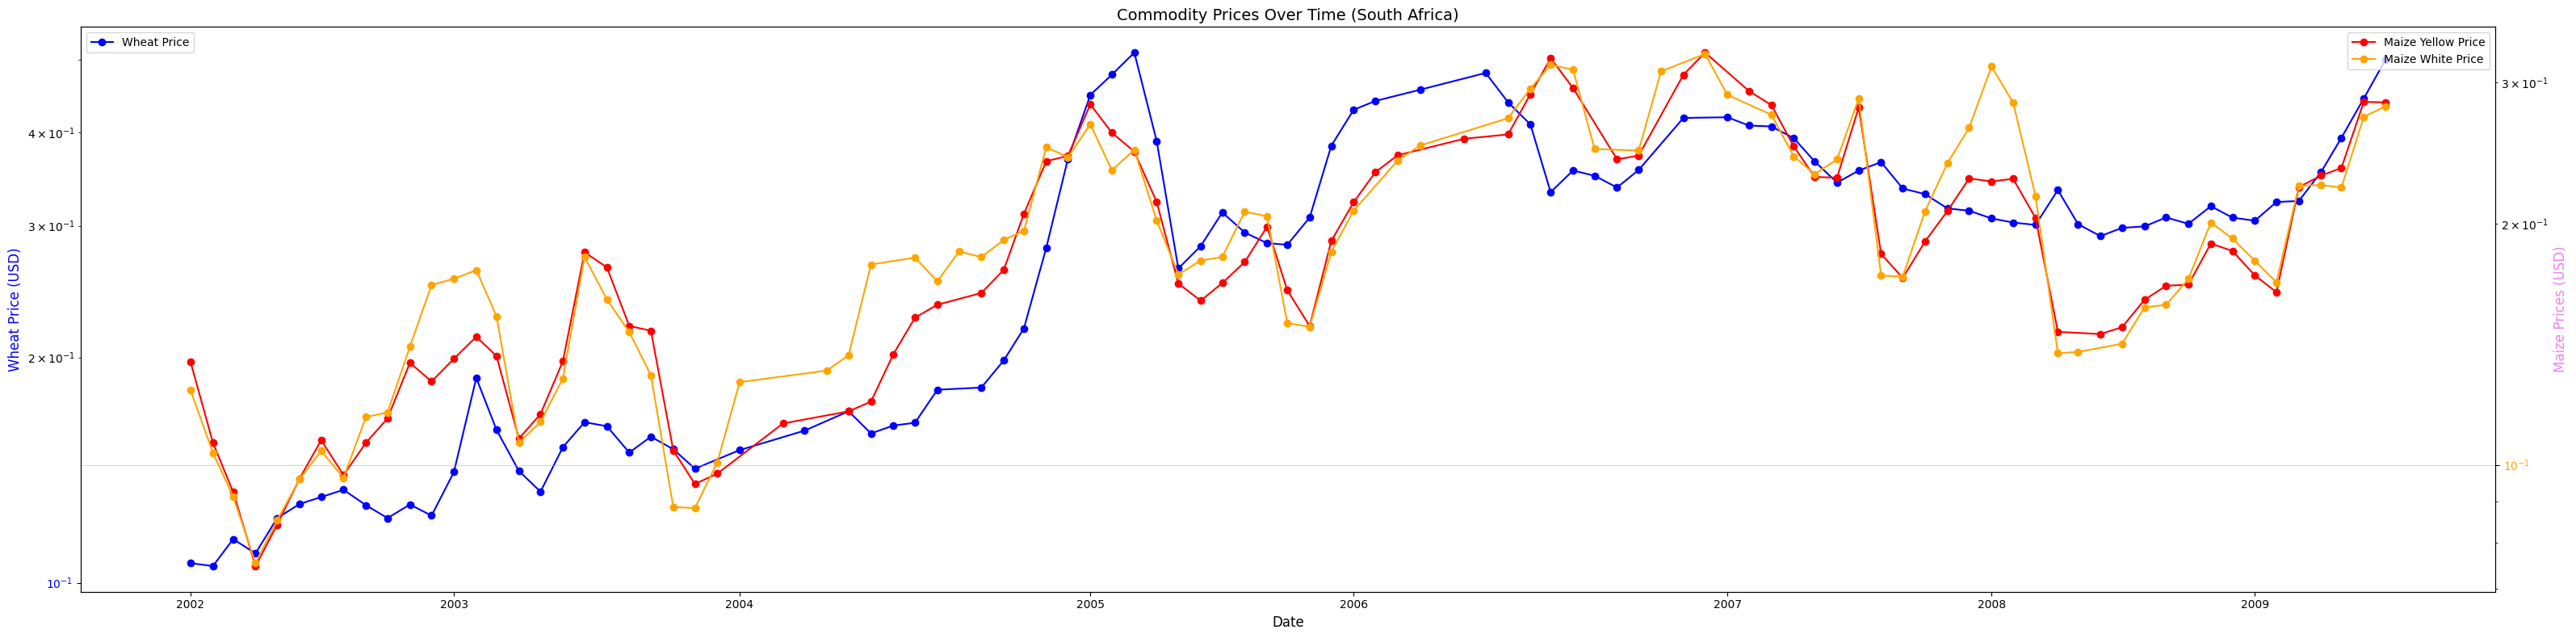

In [26]:


# Filter data for commodities
wheat_df = za_df[za_df['commodity'].str.contains('Wheat', case=False, na=False)]
maize_yellow = za_df[za_df['commodity'].str.contains('Maize \(yellow\)', case=False, na=False)]
maize_white = za_df[za_df['commodity'].str.contains('Maize \(white\)', case=False, na=False)]

# Group and calculate the average USD price
wheat_prices_over_time = wheat_df.groupby('date')['USD-Price'].mean().reset_index()
maize_yellow_over_time = maize_yellow.groupby('date')['USD-Price'].mean().reset_index()
maize_white_over_time = maize_white.groupby('date')['USD-Price'].mean().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(32, 8))
ax2 = ax1.twinx()  # Secondary y-axis for maize prices

# Plot data for wheat
ax1.plot(wheat_prices_over_time['date'], wheat_prices_over_time['USD-Price'], marker='o', color='blue', label='Wheat Price')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Wheat Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set logarithmic scale for ax1
ax1.set_yscale('log')

# Plot data for maize
ax2.plot(maize_yellow_over_time['date'], maize_yellow_over_time['USD-Price'], marker='o', color='red', label='Maize Yellow Price')
ax2.plot(maize_white_over_time['date'], maize_white_over_time['USD-Price'], marker='o', color='orange', label='Maize White Price')

ax2.set_ylabel('Maize Prices (USD)', fontsize=12, color='violet')
ax2.tick_params(axis='y', labelcolor='orange')

# Set logarithmic scale for ax2
ax2.set_yscale('log')

# Define x-ticks to spread out the years
date_ticks = wheat_prices_over_time['date'][::12]  # Example: one tick per year (adjust slicing as needed)
plt.xticks(date_ticks, labels=date_ticks.dt.strftime('%Y'), rotation=45)

# Add title, legends, and gridlines
plt.title('Commodity Prices Over Time (South Africa)', fontsize=14)
plt.grid(alpha=0.5)

ax1.legend(['Wheat Price'], loc='upper left')
ax2.legend(['Maize Yellow Price', 'Maize White Price'], loc='upper right')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
wheat_za_std = wheat_prices_over_time['USD-Price'].std()
maize_yellow_za_std = maize_yellow_over_time['USD-Price'].std()
maize_white_za_std=maize_white_over_time['USD-Price'].std()

print(f"Standard Deviation of Average Wheat Prices Over Time: {wheat_za_std}")
print(f"Standard Deviation of Average Maize(white) Prices Over Time: {maize_yellow_za_std}")
print(f"Standard Deviation of Average Maize(yellow) Prices Over Time: {maize_white_za_std}")


Standard Deviation of Average Wheat Prices Over Time: 0.1143996751970029
Standard Deviation of Average Maize(white) Prices Over Time: 0.06275710761716742
Standard Deviation of Average Maize(yellow) Prices Over Time: 0.06398194592805476


In [28]:
wheat_za_mean = wheat_prices_over_time['USD-Price'].mean()
maize_yellow_za_mean = maize_yellow_over_time['USD-Price'].mean()
maize_white_za_mean = maize_yellow_over_time['USD-Price'].mean()

In [29]:
print(f"Average Wheat Prices Over Time: {wheat_za_mean}")
print(f"Average Maize(white) Prices Over Time: {maize_yellow_za_mean}")
print(f"Average Maize(yellow) Prices Over Time: {maize_white_za_mean}")

Average Wheat Prices Over Time: 0.2789849267399267
Average Maize(white) Prices Over Time: 0.18570209737827717
Average Maize(yellow) Prices Over Time: 0.18570209737827717


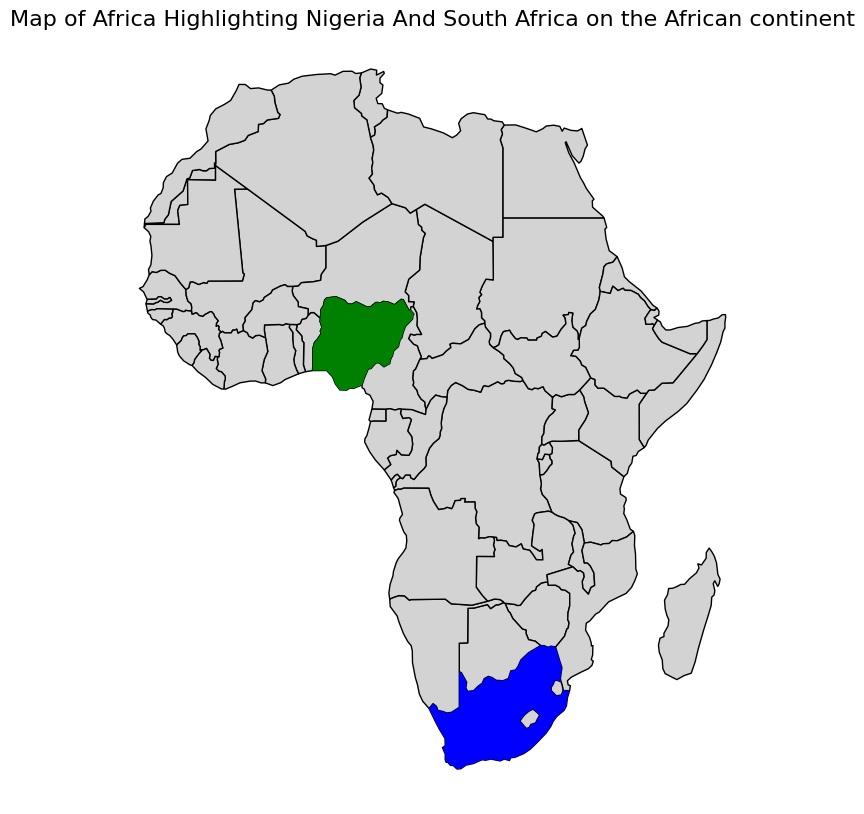

In [30]:



# Load the shapefile directly
world = gpd.read_file('/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp')

# Filter for African countries
africa = world[world['CONTINENT'] == 'Africa'] 
# Separate Nigeria and SOuth Africa for highlighting
nigeria = africa[africa['NAME'] == 'Nigeria']  
south_africa = africa[africa['NAME']=='South Africa']

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

 # Plot Africa
africa.plot(ax=ax, color='lightgrey', edgecolor='black') 

 # Highlight Nigeria
nigeria.plot(ax=ax, color='green')  

 # Highlight South Africa
south_africa.plot(ax=ax, color='blue')

# Add title and adjust layout
plt.title('Map of Africa Highlighting Nigeria And South Africa on the African continent', fontsize=16)
plt.axis('off')
plt.show()


In [31]:
#plt.boxplot(,labels = ['hi','goodbye'])
wheat_usd = wheat_df.groupby('commodity')['USD-Price'].apply(list)

In [32]:
correlation = za_df['USD-Price'].corr(ng_df['USD-Price'])
print('Correlation:', correlation)


Correlation: 0.09423608036550839


****Data Insights from EDA****



Given the limited scope of South African data, our analysis focuses on three commodities: Wheat, Maize (yellow), and Maize (white).

Most Expensive Commodities
Nigeria:

Yam: $4.50/kg

Groundnuts (shelled): $2.30/kg

Rice: $2.10/kg

South Africa:

Wheat: $0.52/kg

Maize (yellow): $0.35/kg

Maize (white): $0.34/kg

While South Africa’s prices seem low, this is partly due to the limited dataset focusing only on three commodities. In contrast, Nigeria’s high prices, especially for yam, groundnuts, and rice, can be attributed to local demand, as these are dietary staples.

**Focus for Further Analysis**

We narrow our analysis to Wheat, Maize (yellow), and Maize (white) to compare trends and statistics between the two countries.

Commodity Retail Prices
Nigeria: Wheat ($1.27/kg),

Maize (yellow) ($0.69/kg), and 

Maize (white) ($0.69/kg).

South Africa: Wheat ($0.52/kg),

Maize (yellow) ($0.34/kg), and

Maize (white) ($0.35/kg).

Despite the differences in absolute prices, the overall price correlation between the two countries is 0.94, indicating strong similarity in price trends.

However, wheat shows a notable price difference, with a correlation of 0.41, as wheat is three times more expensive in Nigeria. This is likely due to South Africa being a net exporter of wheat, while Nigeria is a net importer, and wheat plays a smaller role in Nigerian diets compared to maize.

**Price Trends**

Nigeria:
Wheat: Highly unstable, with a sharp dip in 2004 (falling below $1/kg) 

before rising significantly post-2004.
Maize (yellow): Prices show instability, with fluctuations in 2014 and 2018 before stabilizing at around $1/kg from 2019 onwards.
Maize (white): Follows a similar trend to yellow maize, as the two crops are closely linked, with shared influencing factors.
South Africa:
Prices for all three commodities are relatively stable, showing minor fluctuations compared to Nigeria.

**Statistical Summary**

Nigeria:
Standard Deviations:
Wheat: 0.27 (relatively stable).

Maize (white): 9.36 (significant variation).

Maize (yellow): 10.86 (highest variability).

Means:
Wheat: $1.40/kg.

Maize (white): $32.02/kg.

Maize (yellow): $27.28/kg.

The high standard deviation for maize (white and yellow) highlights significant price fluctuations, while wheat remains relatively stable.

South Africa:
Standard Deviations:

Wheat: 0.11 (very stable).

Maize (white): 0.62.

Maize (yellow): 0.64.

Means:

Wheat: $0.28/kg.

Maize (white): $0.19/kg.

Maize (yellow): $0.19/kg.

The prices in South Africa are remarkably stable, with minor fluctuations across all three commodities.



**Key Takeaways**

Price Stability:

Prices in South Africa are more stable overall, with minimal fluctuations in wheat and maize prices.
Nigeria shows significant variability, particularly in maize prices, likely due to demand, supply chain issues, and dependence on imports.
Commodity-Specific Insights:

Wheat is significantly cheaper in South Africa due to its role as a net exporter, whereas Nigeria faces higher costs as a net importer.
Maize prices in Nigeria are subject to greater fluctuations but play a more central role in the Nigerian diet.
Correlation:

Overall price trends between the two countries are highly correlated (0.94), suggesting shared global market influences.
However, the weaker correlation for wheat (0.41) reflects differences in production and consumption patterns.

**Point of Further Research**

Expanding Data Coverage:

1. Incorporate additional food commodities for South Africa to create a more comprehensive comparison.
Analyze data for other African countries to understand regional price trends and disparities.
Global Market Impact:

2. Investigate how global factors, such as currency exchange rates, trade policies, or international commodity prices, influence food costs in these countries.
Seasonal and Climatic Effects:

3. Examine how seasonal changes and weather patterns, such as droughts or floods, impact crop availability and pricing.
Policy and Economic Factors:

4. Evaluate the role of government subsidies, import/export restrictions, or inflation rates on food affordability.
Consumer Impact:

5. Study the socio-economic effects of food price fluctuations on different income groups within each country.
Prediction Models:

6. Build predictive models using machine learning to forecast future price trends based on historical data and external factors like climate and trade.




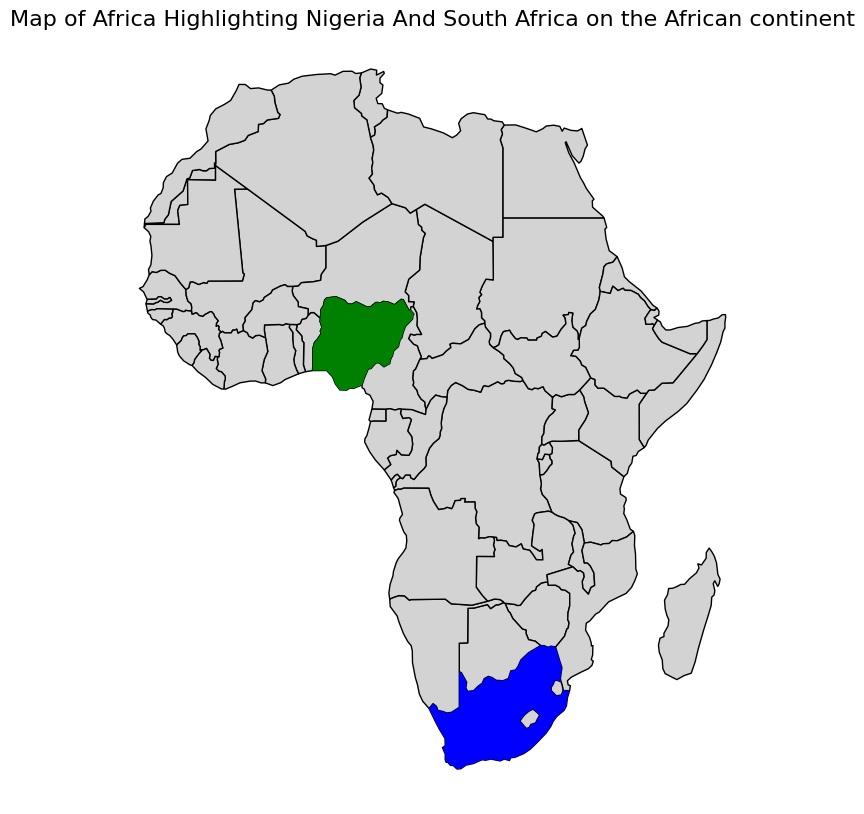

In [33]:
# Load the shapefile directly
world = gpd.read_file('/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp')

# Filter for African countries
africa = world[world['CONTINENT'] == 'Africa'] 
# Separate Nigeria and SOuth Africa for highlighting
nigeria = africa[africa['NAME'] == 'Nigeria']  
south_africa = africa[africa['NAME']=='South Africa']

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

 # Plot Africa
africa.plot(ax=ax, color='lightgrey', edgecolor='black') 

 # Highlight Nigeria
nigeria.plot(ax=ax, color='green')  

 # Highlight South Africa
south_africa.plot(ax=ax, color='blue')

# Add title and adjust layout
plt.title('Map of Africa Highlighting Nigeria And South Africa on the African continent', fontsize=16)
plt.axis('off')
plt.show()